To get a better view of what's going on behind a trend here's how using tweepy you can visualize what's guiding a trend.
Retweets rule the day.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

import tweepy

#get this from apps.twitter.com
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_token_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

def get_tweets(hashtag, back_date=1, sleep=False): #use sleep if the server forcefully closes the connection
    tweets = {}
    current_date = datetime.date.today() - datetime.timedelta(days=back_date)
    date_string = "{0}/{1}/{2}".format(current_date.year, current_date.month, current_date.day)

    try:
        for tweet in tweepy.Cursor(api.search,q=hashtag, count=100, lang="en", since="2018-03-21").items():
            date = tweet.created_at.strftime("%d-%m-%Y %H")

            try:
                retrieve_score = tweets[date]

            except Exception as e:
                tweets[date] = {'retweets': 0, 'tweet': 0, 'likes': 0}
                retrieve_score = tweets[date]

            #retweets of your tweet
            retrieve_score['retweets'] += tweet.retweet_count
            #add likes count
            retrieve_score['likes'] += tweet.favorite_count

            #add's one if it's also a retweet
            if tweet.retweeted:
                retrieve_score['retweets'] += 1

            else: #if unique/edited/new adds to tweet
                retrieve_score['tweet'] += 1
            if sleep:
                time.sleep(1) #
    except Exception as e:
        print (e)
    
    return tweets

def graph_trend(tweets, likes=True, tweet=True, retweets=True):
    keys = tweets.keys()
    keys.sort()
    un_likes = []
    un_tweet = []
    un_retweets = []
    
    for key in keys:
        item = tweets[key]
        un_likes.append(item['likes'])
        un_tweet.append(item['tweet'])
        un_retweets.append(item['retweets'])
        
    if retweets:
        plt.plot(keys, un_retweets, label='retweets')
    if likes:
        plt.plot(keys, un_likes, label='likes')
    if tweet:
        plt.plot(keys, un_tweet, label='tweets')
        
    plt.xlabel('number')
    plt.ylabel('dates')
    plt.title('trend graph')
    plt.legend()
    plt.show()
        

In [5]:
tweets = get_tweets(hashtag='#MsetoFriday', sleep=True)

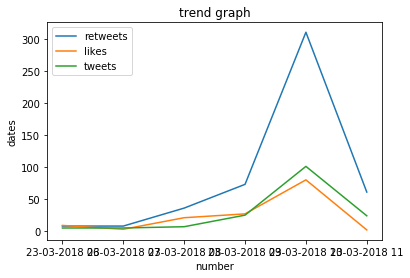

In [16]:
graph_trend(tweets=tweets)

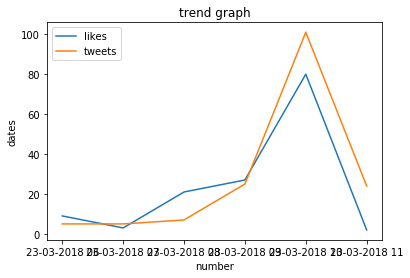

In [17]:
graph_trend(tweets=tweets, retweets=False)

In [18]:
galaxy = get_tweets(hashtag='#GalaxyS9LaunchKE', sleep=True)

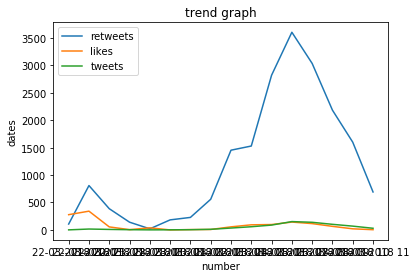

In [19]:
graph_trend(tweets=galaxy)

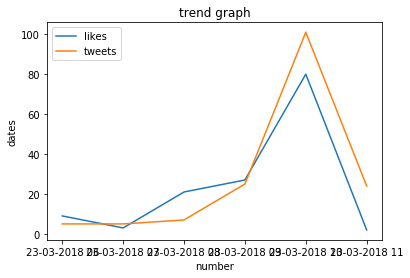

In [20]:
graph_trend(tweets=tweets, retweets=False)